## 1 - Importamos los datos

In [24]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
solicitantes = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Analítica de Datos/DataBase SoliCred.xlsx')
solicitantes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


## 2 - Limpiamos los datos

In [25]:
solicitantes.shape
# Como Shell obtendremos (Filas, Columnas).

# Eliminamos los registros donde PreApr está vacío.
XD = solicitantes.dropna(subset=['PreApr'])
# Sginifica 'drop' 'na' (vacíos). El subset, es la dirección donde el comando irá a eliminar los 'na' o 'vacíos'.
# Con esto vamos a eliminar las FILAS que no necesitamos.

# Posteriormente escogemos las variables que usaremos como independientes.

XD = XD [['Edad','Hijos','Perscargo','Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)','Plazo','Cuota (COP)']]
XD
# Ahora tenemos menos filas y SOLO las 9 columnas que hemos definido que contenga la variable 'XD'.


,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
0,38,1,0,3,5424576,7585302,2.815030e+06,48,82691.506204
1,51,6,1,4,1144064,1640079,6.301439e+05,36,22781.212598
2,37,2,0,3,2069853,2831440,1.280540e+06,36,46294.596244
3,29,1,0,2,1893080,2482276,1.393414e+06,24,69564.950015
4,42,3,4,2,3000367,3630221,2.252986e+06,24,112478.307883
...,...,...,...,...,...,...,...,...,...
8371,48,0,0,3,4831392,3392105,3.366188e+06,36,121695.762156
8373,31,2,0,5,5891088,4292158,3.918572e+06,48,115108.056436
8374,38,0,0,3,3092079,3028098,2.677266e+06,36,96789.562091
8375,43,1,2,2,2542007,3513112,1.375112e+06,36,49713.608249


In [26]:
# Escojo la variable dependiente. Esto con el fin de tener una ecuación eventualmente de la forma yd = x1 + x2 + x3 + x4.

yd = solicitantes['PreApr'].dropna() # .dropna para eliminar los 'na' ya que llamamos la variable 'solicitantes'.
yd

,PreApr
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
8371,1.0
8373,1.0
8374,1.0
8375,1.0


## 3 - Implementamos el modelo de Naive Bayes

In [27]:
# Importamos las librerias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

# Luego convierto los datasets y hago un array para poder trabajar con ellos.
XDArray = np.array(XD, dtype=float)
ydArray = np.array(yd, dtype=float)

## Entrenamos el modelo

In [28]:
# Entrenamos el Modelo (Fase Train). Creamos la variable 'modeloNB'.
modeloNB = GaussianNB() # Variable que aloja el modelo.

# Ahora alimentaremos al modelo con las variables necesarias para que el modelo sea entrenado, en este caso 'XDArray' y 'ydArray'.
modeloNB.fit(XDArray, ydArray)

GaussianNB()

In [29]:
# Predecimos posteriormente los yd (Etapa Test). Creamos la variable 'ydPred'.
ydPred = modeloNB.predict(XDArray) # De nuevo le damos los valores almacenados en la variable 'XDArray' para que el modelo pueda predecir en 'ydPred'.


## 4 - Matriz de confusión

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Creamos una variable 'mc' para contener la matriz de confusión.
mc = confusion_matrix(ydArray, ydPred)
mc

array([[2539,  420],
       [1041, 1842]])

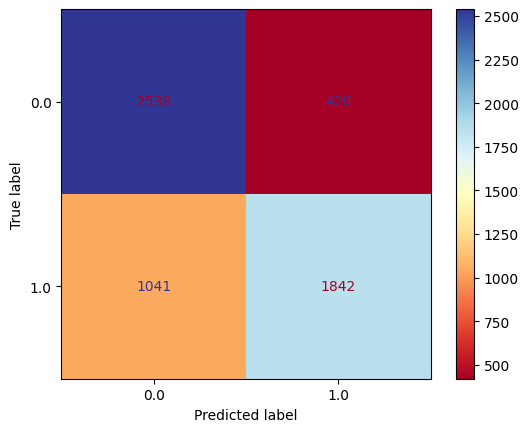

In [31]:
disp = ConfusionMatrixDisplay(mc, display_labels=modeloNB.classes_)
disp.plot(cmap = 'RdYlBu')
plt.show()

## 5 - Calcular las métricas de evaluación del modelo

In [32]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener
# Reducimos las columnas a solo aquellas que son necesarias.
XDGener = XDGener [['Edad','Hijos','Perscargo','Estrato', 'Ingresos', 'Egresos', 'Monto (EAD)','Plazo','Cuota (COP)']]
XDGener

,Edad,Hijos,Perscargo,Estrato,Ingresos,Egresos,Monto (EAD),Plazo,Cuota (COP)
6,38,3,0,3,1534711,1658694,7.913126e+05,60,2.009414e+04
7,47,0,0,2,136750,171155,1.213014e+05,48,3.563229e+03
11,46,0,1,4,7097220,9525257,3.174456e+06,3,1.090054e+06
13,37,4,2,2,1791987,1391431,2.334042e+06,48,6.856249e+04
16,22,1,0,2,2892545,3576891,1.887636e+06,36,6.824255e+04
...,...,...,...,...,...,...,...,...,...
8357,24,1,0,4,2433168,1518301,3.494059e+06,48,1.026380e+05
8358,66,1,0,1,83684,120852,3.822821e+04,24,1.908509e+03
8367,32,0,1,4,1133063,766199,1.013852e+06,36,3.665316e+04
8372,35,2,1,3,3073152,3812690,2.156239e+06,18,1.375805e+05


In [33]:
# Solicito al modelo que me haga prónostico para estos solicitantes que no están clasificados aún
ydGener = modeloNB.predict(XDGener)
ydGener

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([0., 0., 1., ..., 0., 0., 0.])

In [34]:
## Creo una SERIE, que sí puede contener índices.
ydGenerSerie = pd.Series(ydGener,index= solicitantes[solicitantes['PreApr'].isna()].index)
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


In [35]:
## Completo los valores de PreApr que no existían antes:
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

/tmp/ipython-input-1475774158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [36]:
# Ahora podemos ver la información de la variable de solicitantes
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [38]:
# Extraigo los valores de la matriz de confusión
# Tengamos en cuenta que la variable 'mc' contiene una 'tabla' con la siguiente forma: 0[0,1]
#                                                                                      1[0,1]
#
VN = mc [0,0]
FP = mc [0,1]
FN = mc [1,0]
VP = mc [1,1]
# Una vez definidas estas variables, podemos proceder a calcular las métricas de evaluación del modelo

exactitud = (VP + VN) / mc.sum() # 'cm.sum' es la manera de hacer la sumatoria de la tabla que contiene la variable 'mc'
error = (FP + FN) / mc.sum()
sensibilidad = VP / (VP + FN)
especificidad = VN / (VN + FP)
precisión = VP / (VP + FP)

print(f'La exactitud del modelo es de: {exactitud:.2%}')
print(f'El error del modelo es de: {error:.2%}')
print(f'La sensibilidad del modelo es de: {sensibilidad:.2%}')
print(f'La especificidad del modelo es de: {especificidad:.2%}')
print(f'La precisión del modelo es de: {precisión:.2%}')

La exactitud del modelo es de: 74.99%
El error del modelo es de: 25.01%
La sensibilidad del modelo es de: 63.89%
La especificidad del modelo es de: 85.81%
La precisión del modelo es de: 81.43%


In [39]:
# Exporto la base de datos completa a Excel en la carpeta 'content'
solicitantes.to_excel('SolicitantesCompleta.xlsx')

## CONCLUSIÓN
Al comparar los resultados del modelo con 4 variables y el de 9 variables usando la isma base de datos se evidencia que agregar nás variables no garantiza mejor desempeño sino que cambia el tipo de errores que comete el odelo. El modelo de 4 variables tiene una exactitud ligeramente mayor (76,14%) y un menor error(23,86%), lo que indica un desempeño mas equilibrado. en cambio, el modelo de 9 variables baja su exactitud a 74,99% y aumenta el error a 25,01% principalmente porque perde más casos de personas que sí eran pre aprobables (menor sensibilidad). no obstante, el modelo de 9 variables es más estricto ya que mejora levemente la especificidad y la presición, lo que significa qeu reduce falsos positivos y cuando aprueba alguien, suele acertar un poco más.